# `20180511a` - Enveloppe detection tests

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import griddata
import math
from scipy.signal import decimate, convolve
import json 
import re
import glob, os

## Let's open an image

This should be a 60 lines scan of the wirephantom. Let's check it.

In [153]:
npz = np.load("../20180430a/wire/dataset.npz")
image = npz["arr_1"]

with open('../20180430a/wire/p_servo-23.json') as json_data:
    d = json.load(json_data)
    print d.keys()

[u'firmware_md5', u'target', u'parameters', u'registers', u'position', u'firmware_version', u'data']


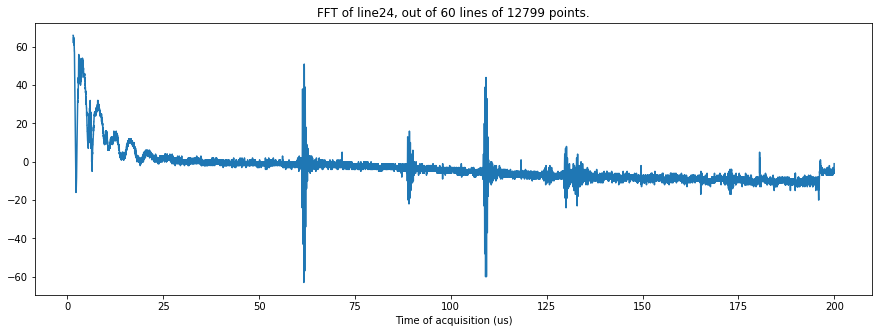

In [168]:
TestLine = 24
plt.figure(figsize=(15,5))
N,L = np.shape(image)
t = [ x/64.0 for x in range(L)]
plt.plot(t[100:],image[TestLine][100:])
plt.xlabel("Time of acquisition (us)")
plt.title("FFT of line"+str(TestLine)+", out of "+str(N)+" lines of "+str(L)+" points.")
plt.show()

In [169]:
DAC = [ int(x) for x in d['registers'].keys() if int(x) < 200]
DAC.sort()
DACValues = [d['registers'][str(key)] for key in DAC]
print DACValues,len(DAC)

[25, 26, 28, 30, 32, 34, 36, 38, 40, 41, 43, 45, 47, 49, 51, 53, 55, 56, 58, 60, 62, 64, 66, 68, 70, 71, 73, 75, 77, 79, 81, 83, 85, 86, 88, 90, 92, 94, 96, 0, 0] 41


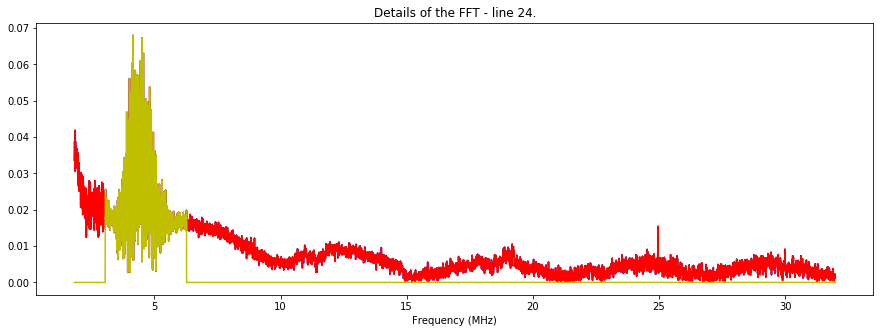

In [170]:
rawSig = image[TestLine]

FFT = np.fft.fft(rawSig)
FFTCleaned = np.fft.fft(rawSig)
FFTLow = np.fft.fft(rawSig)

FStart = 0.068*len(FFTCleaned)*0.7
FStop = 0.196*len(FFTCleaned)*0.5

for k in range(len(FFTCleaned)/2 +1):
    if (k < FStart or k > FStop): # in (k < 550000 or k > 790000) # 0.068 0.196
        FFTCleaned[k] = 0
        FFTCleaned[-k] = 0
    if k < 100:
        FFTLow[k] = 0
        FFTLow[-k] = 0
        
Scale = max(FFT)
ff = [ 64*2.0*x/(2*len(rawSig)) for x in range(len(rawSig)/2)]

plt.figure(figsize=(15,5))
plt.plot(ff[len(FFT)/35:len(FFT)/2],np.abs(FFT)[len(FFT)/35:len(FFT)/2]/Scale,"b")
plt.plot(ff[len(FFT)/35:len(FFT)/2],np.abs(FFTLow)[len(FFT)/35:len(FFT)/2]/Scale,"r")
plt.plot(ff[len(FFT)/35:len(FFT)/2],np.abs(FFTCleaned)[len(FFT)/35:len(FFT)/2]/Scale,"y")
plt.title("Details of the FFT - line "+str(TestLine)+".")  
plt.xlabel("Frequency (MHz)")
plt.savefig("fft"+str(TestLine)+".jpg", bbox_inches='tight')
plt.show()

In [171]:
F = np.real(np.fft.ifft(FFTCleaned))
FL = np.real(np.fft.ifft(FFTLow))
FH = np.asarray(np.abs(signal.hilbert(F)))

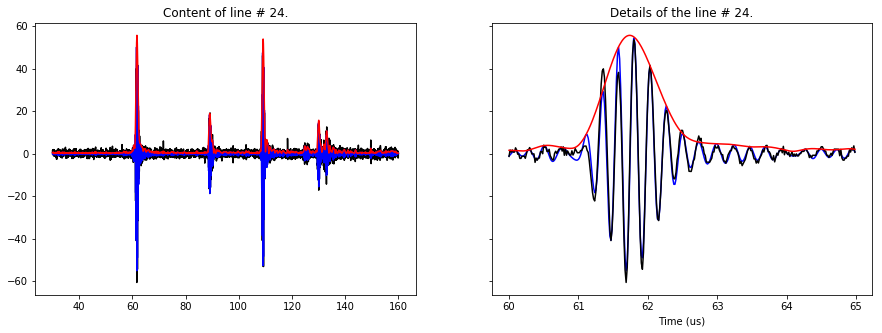

In [172]:
#plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))

t1 = 30*64
t2 = 160*64

T1 = 60*64
T2 = 65*64

ax1.plot(t[t1:t2],FL[t1:t2],"k")
ax1.plot(t[t1:t2],F[t1:t2],"b")
ax1.plot(t[t1:t2],FH[t1:t2],"r")
ax1.set_title("Content of line # "+str(TestLine)+".")  

ax2.plot(t[T1:T2],F[T1:T2],"b")
ax2.plot(t[T1:T2],FL[T1:T2],"k")
ax2.plot(t[T1:T2],FH[T1:T2],"r")

ax2.set_title("Details of the line # "+str(TestLine)+".")  
plt.xlabel("Time (us)")
plt.savefig("detail_line_"+str(TestLine)+".jpg", bbox_inches='tight')

plt.show()

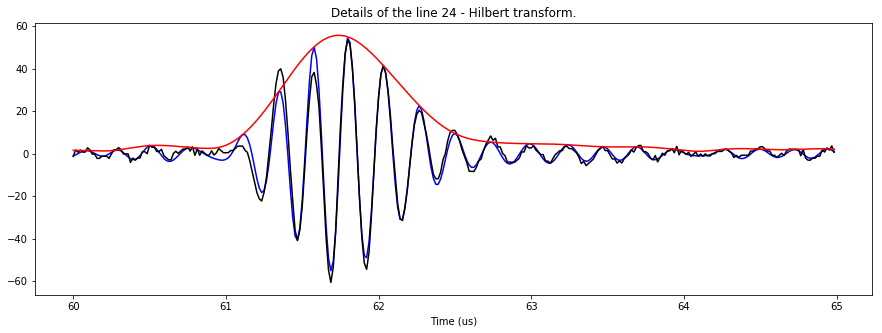

In [173]:
plt.figure(figsize=(15,5))

plt.plot(t[T1:T2],F[T1:T2],"b")
plt.plot(t[T1:T2],FL[T1:T2],"k")
plt.plot(t[T1:T2],FH[T1:T2],"r")

plt.title("Details of the line "+str(TestLine)+" - Hilbert transform.")  
plt.xlabel("Time (us)")

plt.savefig("env_hilbert_"+str(TestLine)+".jpg", bbox_inches='tight')
plt.show()

# Testing other enveloppe detection

In [174]:
l = 5
mm = []
for k in range(L-l):
    mm.append(np.max(abs(FL[k:k+l]))  )

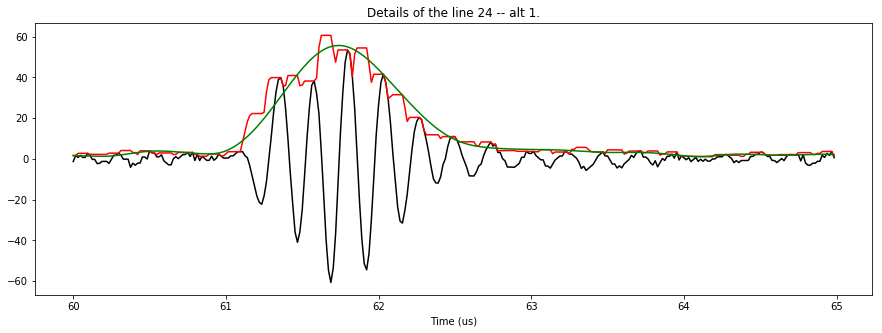

In [175]:
plt.figure(figsize=(15,5))

#plt.plot(t[T1:T2],F[T1:T2],"y")
plt.plot(t[T1:T2],FL[T1:T2],"k")
plt.plot(t[T1:T2],mm[T1:T2],"r")
plt.plot(t[T1:T2],FH[T1:T2],"g")
    
plt.title("Details of the line "+str(TestLine)+" -- alt 1.")  
plt.xlabel("Time (us)")
plt.savefig("env_alt1_"+str(TestLine)+".jpg", bbox_inches='tight')
plt.show()